In [5]:
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})

# notebook settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 11 Classes

In [33]:
exp1 = pd.DataFrame(pd.read_pickle("/srv/nas/mk2/projects/pan-cancer/experiments/feature_sel/2020.03.23_11_19594-20/model_meta_data.pkl"))
exp2 = pd.DataFrame(pd.read_pickle("/srv/nas/mk2/projects/pan-cancer/experiments/feature_sel/2020.03.23_22:56_11_4500-50/model_meta_data.pkl"))
exp3 = pd.DataFrame(pd.read_pickle("/srv/nas/mk2/projects/pan-cancer/experiments/feature_sel/2020.03.24_10:57_11_300-60/model_meta_data.pkl"))
full = pd.concat([exp1, exp2, exp3])

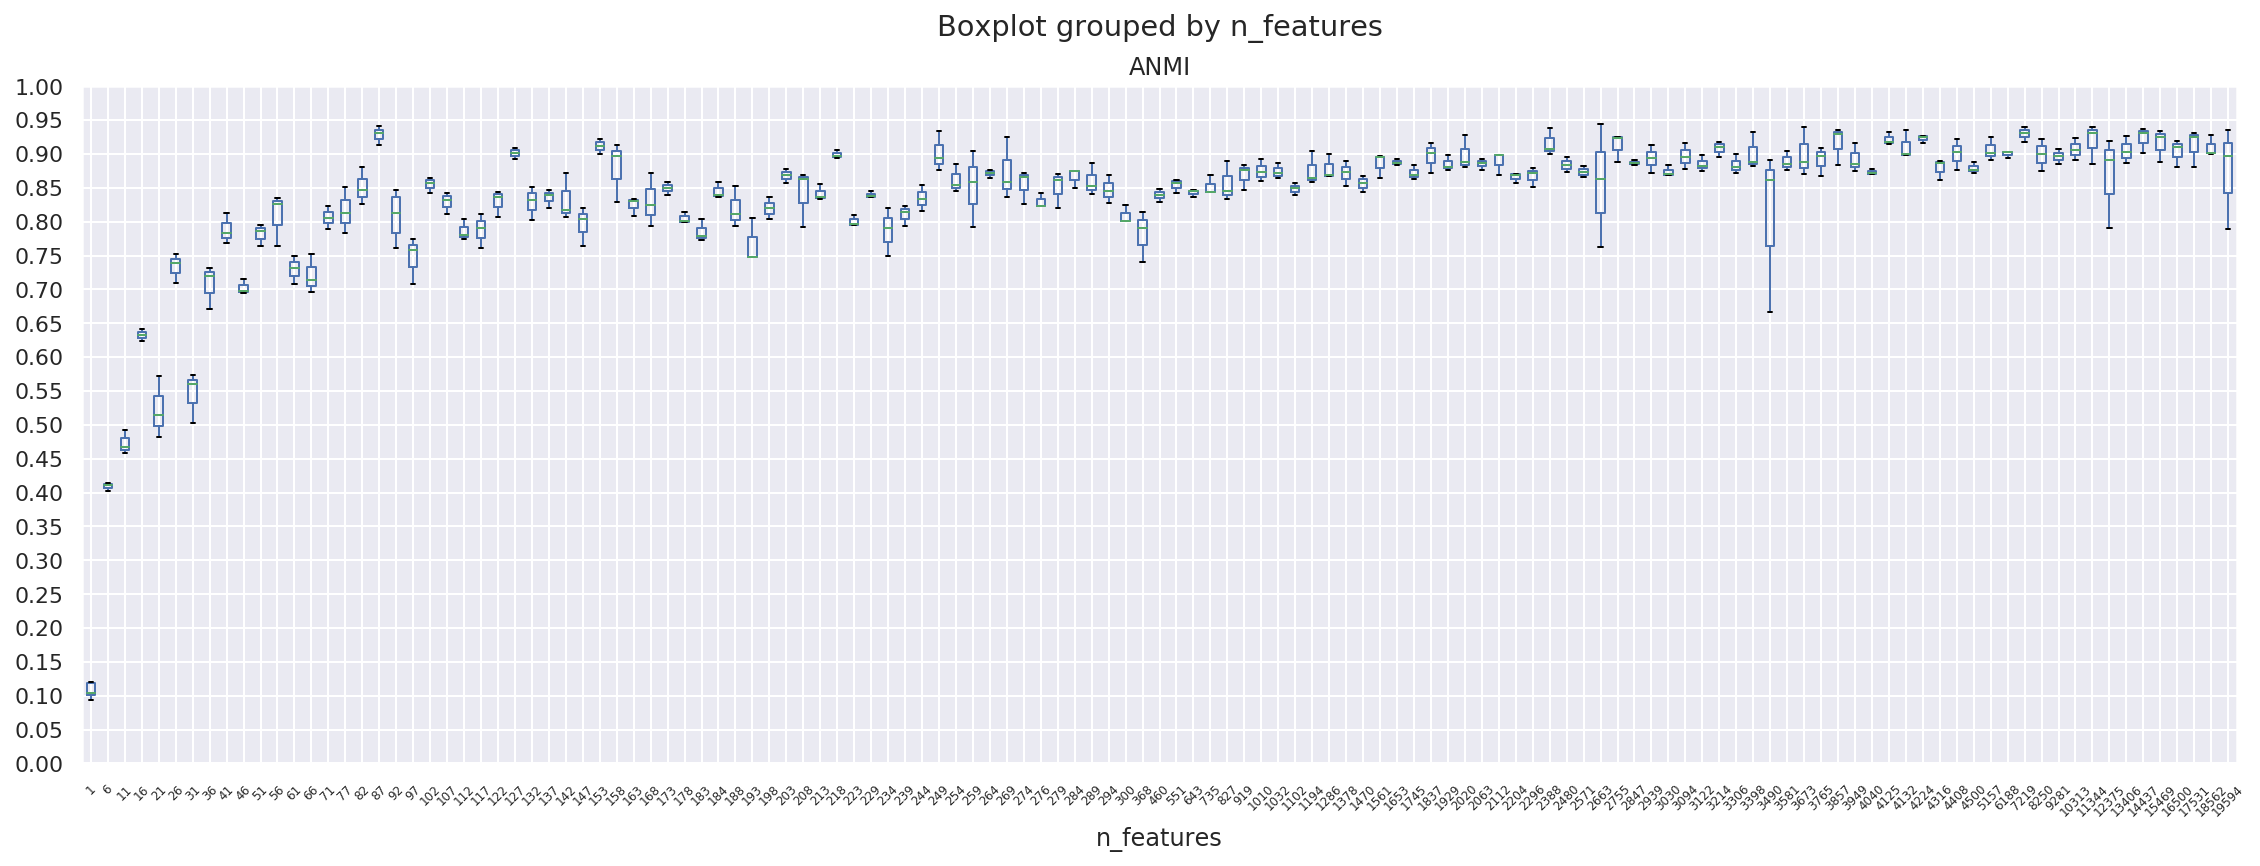

In [34]:
full.boxplot(by='n_features', column='ANMI', rot=45)
_ = plt.ylim((0., 1.))
_ = plt.yticks(np.arange(0., 1.01, 0.05))
_ = plt.xticks(fontsize=6)

In [46]:
full_mean = full.groupby(['n_features']).mean()

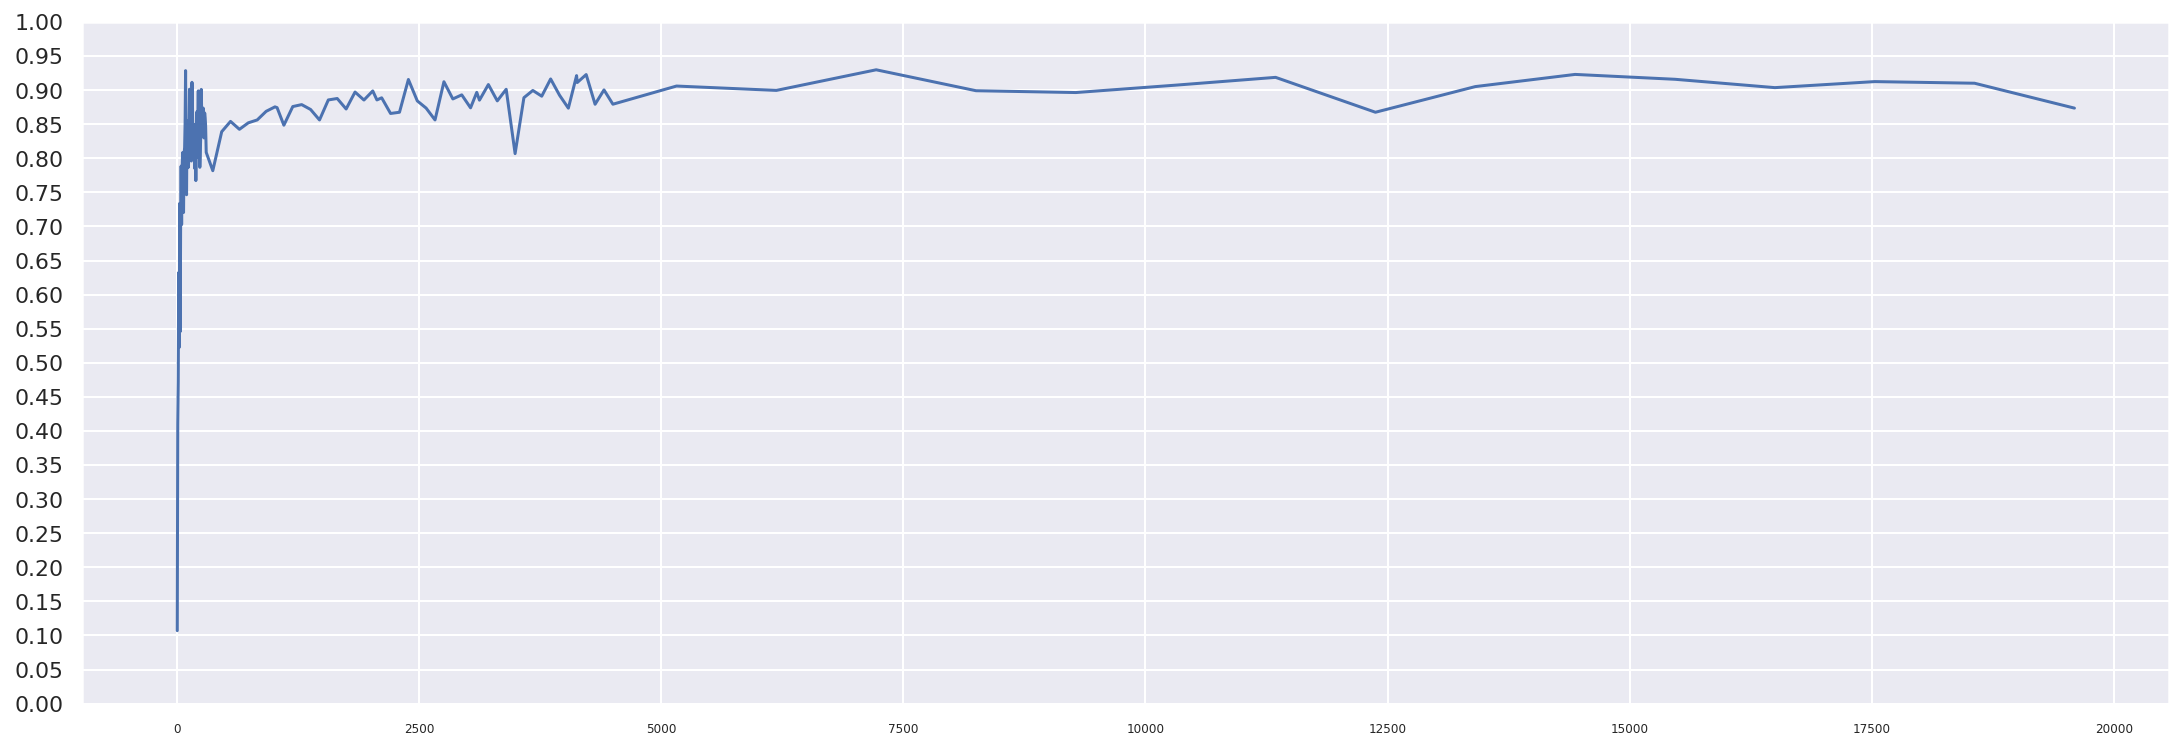

In [56]:
plt.plot(full_mean.index, full_mean['ANMI'])
_ = plt.ylim((0., 1.))
_ = plt.yticks(np.arange(0., 1.01, 0.05))
_ = plt.xticks(fontsize=6)

In [36]:
#sns.regplot(x='n_features', y='ANMI', data=full, lowess=True)

## 26 Classes

In [37]:
exp26 = pd.DataFrame(pd.read_pickle("/srv/nas/mk2/projects/pan-cancer/experiments/feature_sel/2020.03.24_14:59_26_2000-100/model_meta_data.pkl"))

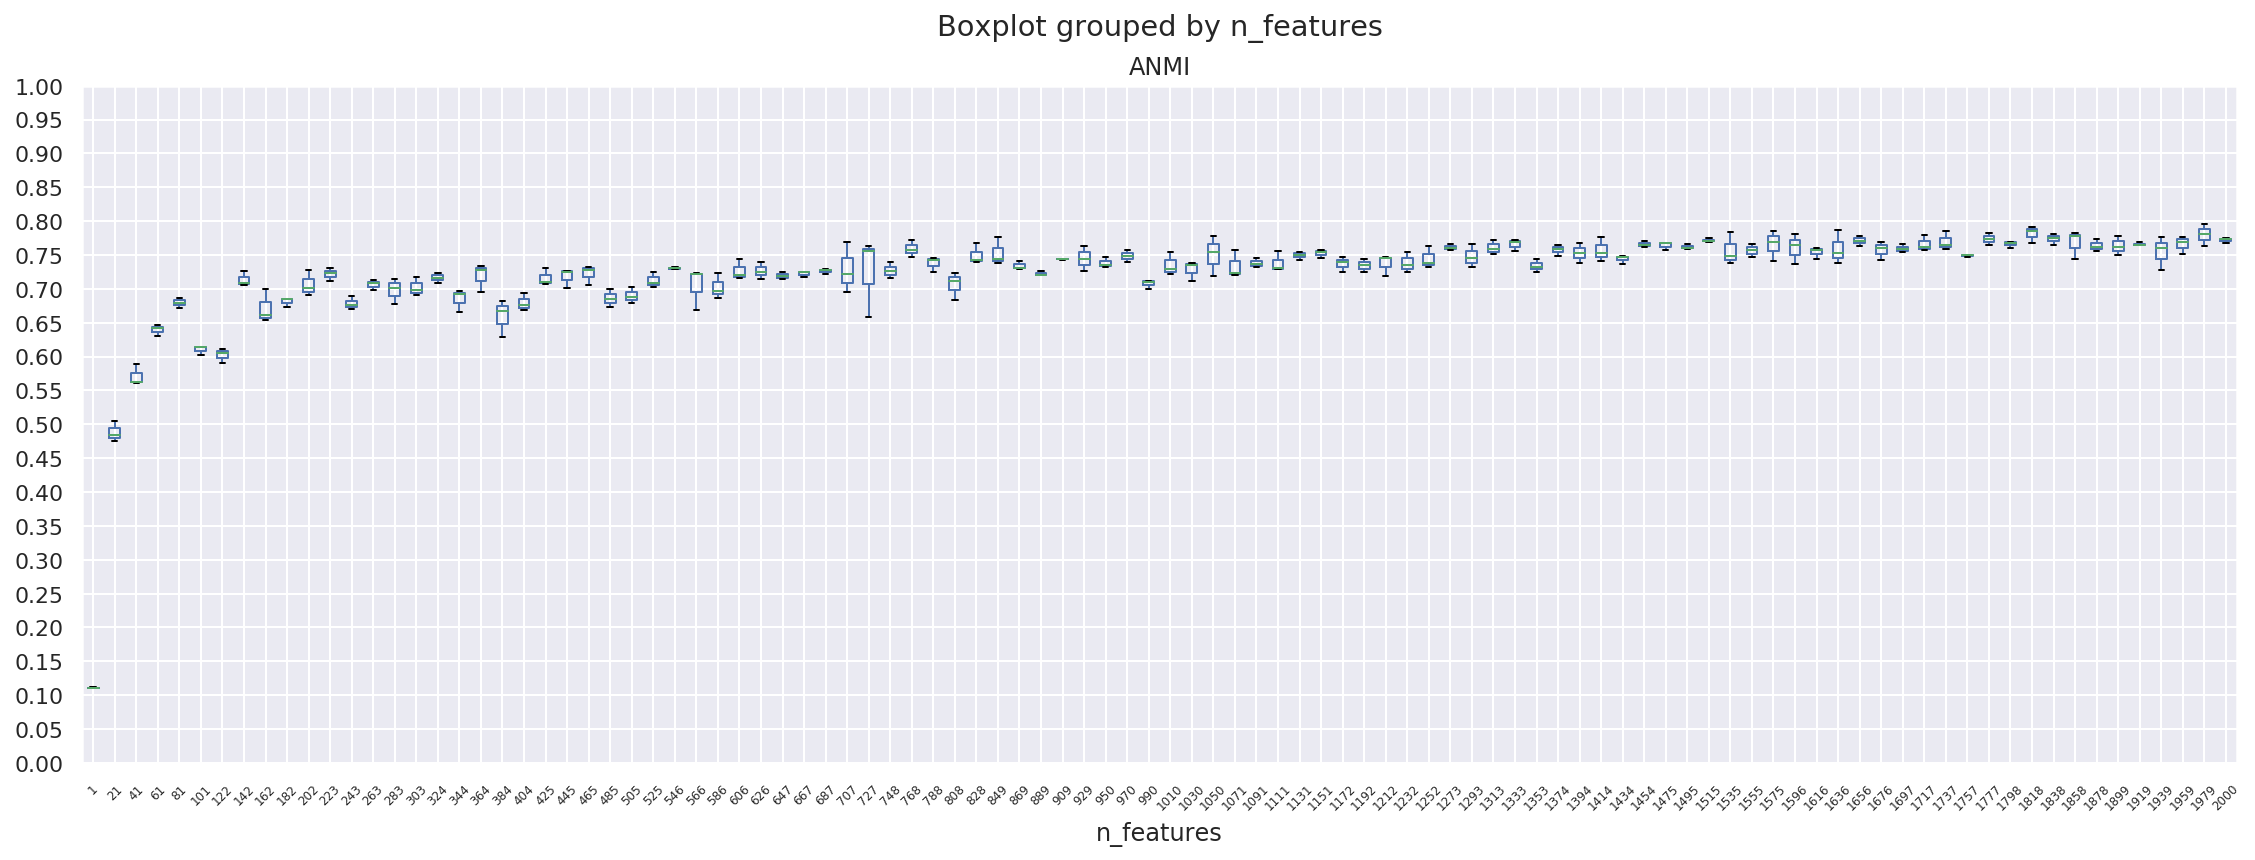

In [38]:
exp26.boxplot(by='n_features', column='ANMI', rot=45)
_ = plt.ylim((0., 1.))
_ = plt.yticks(np.arange(0., 1.01, 0.05))
_ = plt.xticks(fontsize=6)

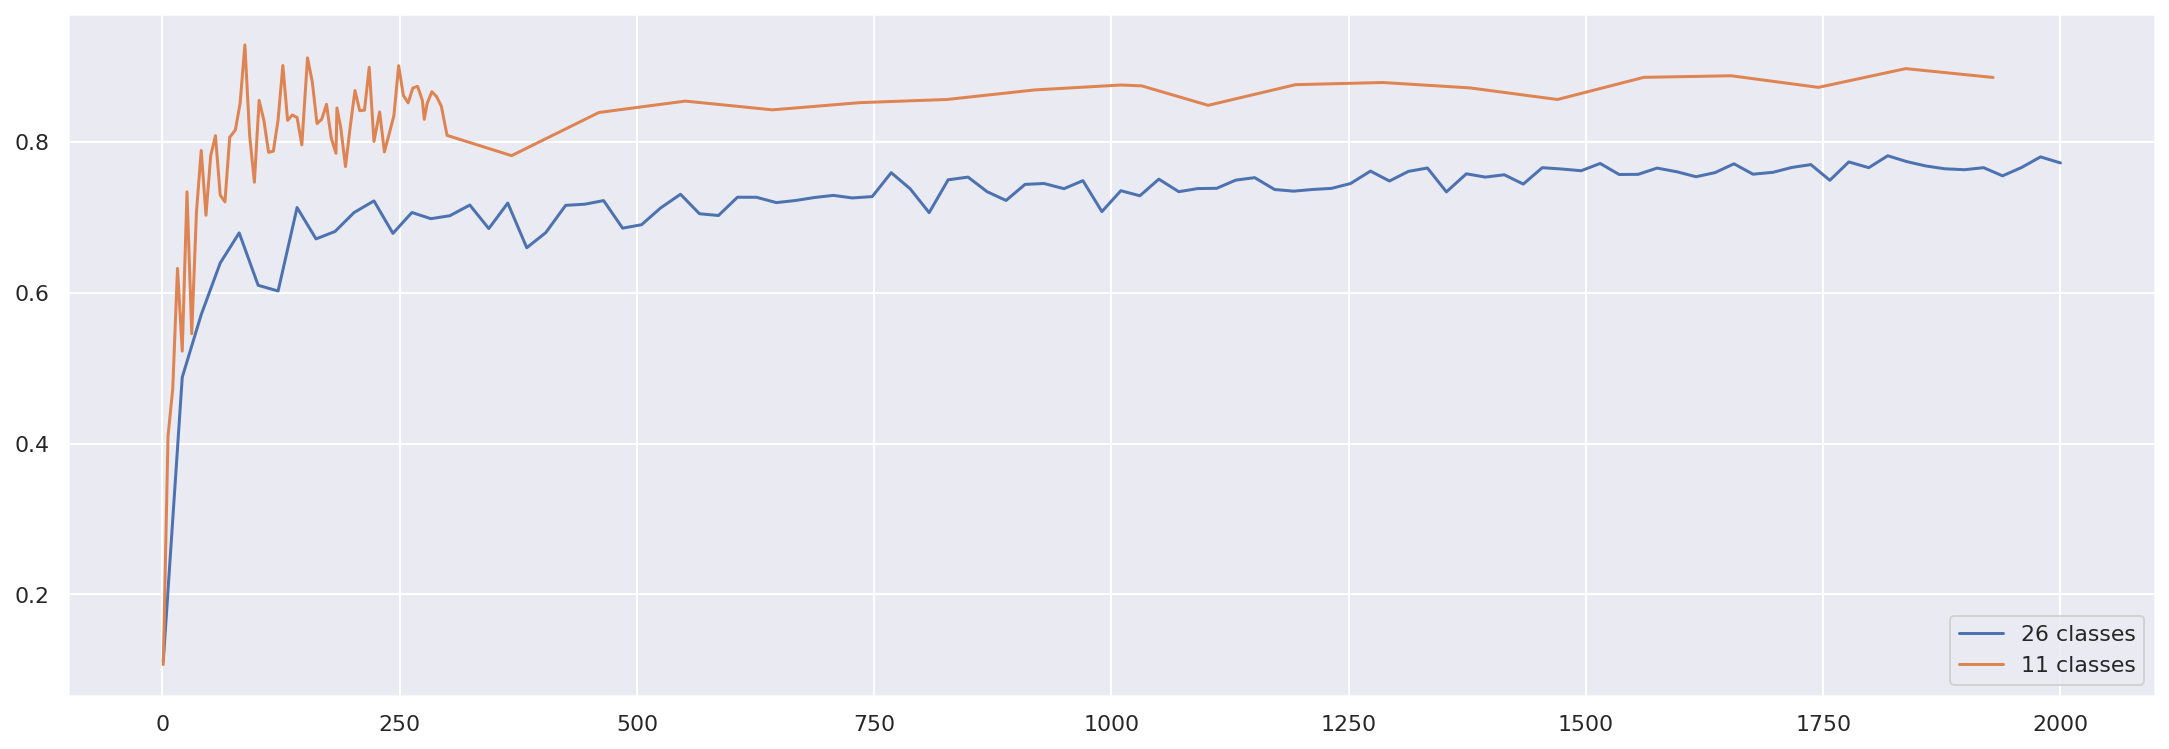

In [44]:
foo = exp26.groupby(['n_features']).mean()
bar = full[full['n_features']<=2000].groupby(['n_features']).mean()
plt.plot(foo.index, foo['ANMI'], label='26 classes')
plt.plot(bar.index, bar['ANMI'], label='11 classes')
plt.legend()

In [34]:
fd = full[full['n_features']<=2000].groupby(['n_features']).mean().rolling(5).mean()
dexp26 = exp26.groupby(['n_features']).mean().rolling(5).mean()

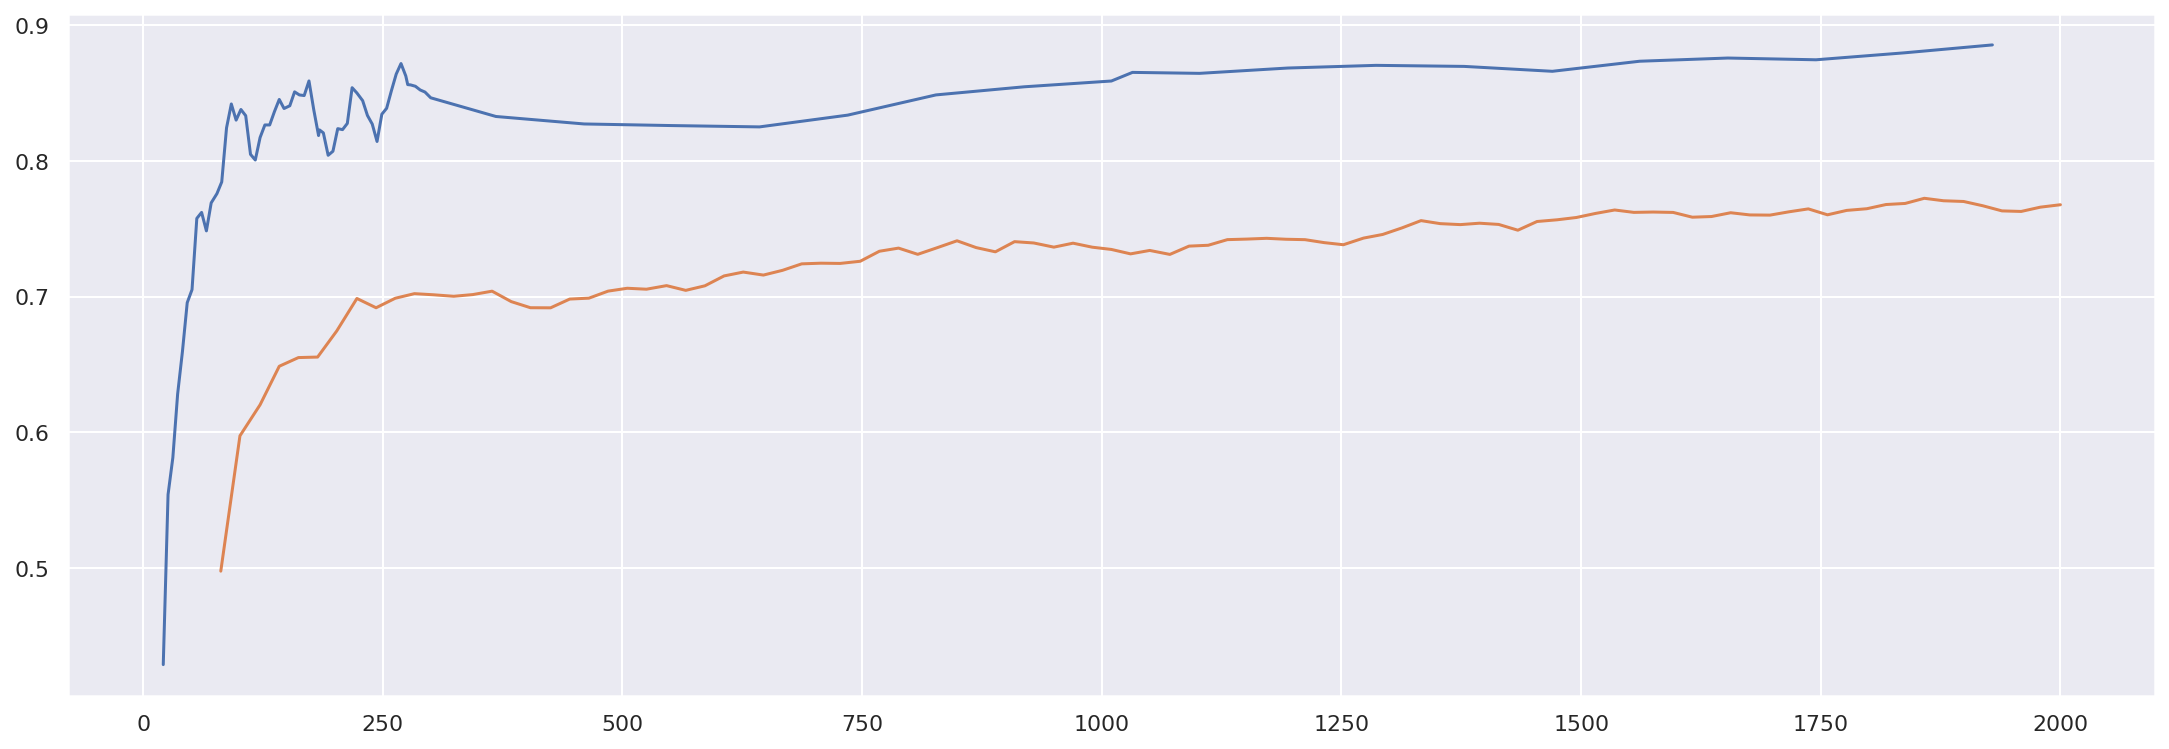

In [35]:
plt.plot(fd.index, fd['ANMI'], label='11 Clusters')
plt.plot(dexp26.index, dexp26['ANMI'], label='26 Clusters')

In [6]:
def test_func(x, a):
    return x / (x + a)

In [19]:
n_feat = np.arange(0, 2000, 5)
true_anmi = [test_func(n, 20) for n in n_feat]

In [20]:
rand_anmi = np.repeat(0.1, len(n_feat))

In [21]:
diff_anmi = true_anmi - rand_anmi

In [27]:
noise = [0.0001*n for n in n_feat]

In [30]:
diff_noise = np.array(true_anmi) - np.array(noise)

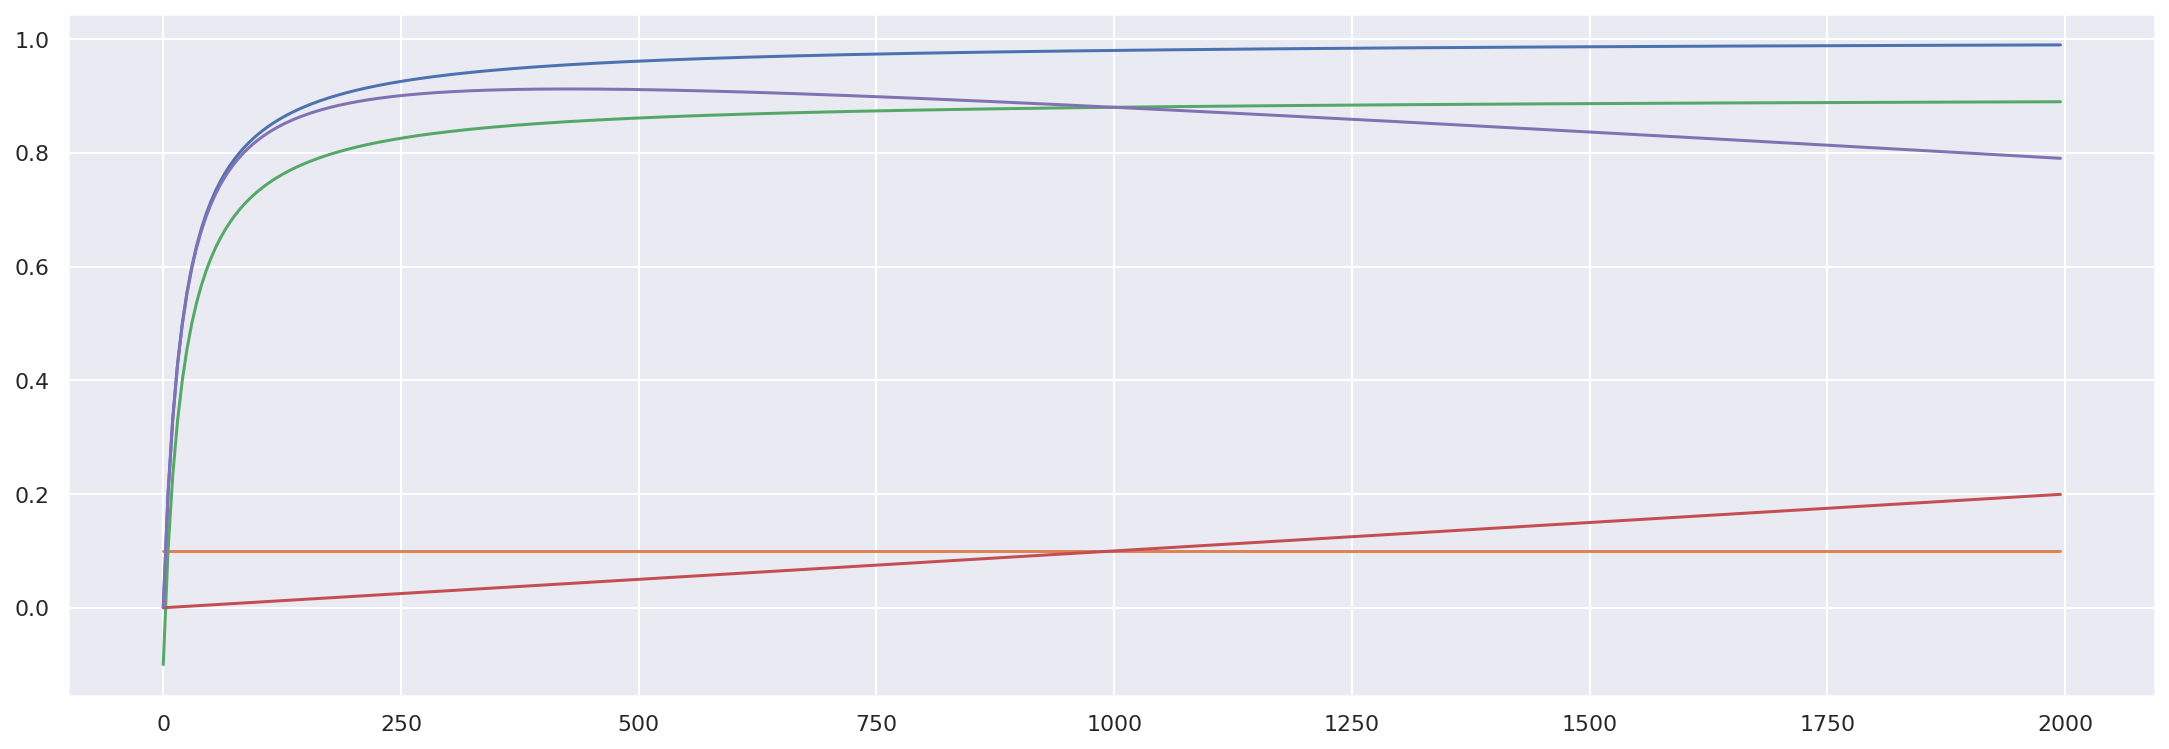

In [31]:
plt.plot(n_feat, anmi)
plt.plot(n_feat, rand_anmi)
plt.plot(n_feat, diff_anmi)
plt.plot(n_feat, noise)
plt.plot(n_feat, diff_noise)